In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import process_data.directions_coordinates as dc
import process_data.sincos as sincos
import process_data.plot_polymer_histgram as my_plot
import functions as func
import process_data.n_n_distance as nn
import json
from tqdm.auto import tqdm

# For on-lattices

## Random
### 16 monomers

In [2]:
polymer_len = 16
real_directions = np.load(f'../data/random/on_lattices/{polymer_len}/directions.npy')
real_sin_cos = np.load(f'../data/random/on_lattices/{polymer_len}/sin_cos.npy')
real_coordinates = np.load(f'../data/random/on_lattices/{polymer_len}/coordinates.npy')

In [ ]:
import fnn.four_layers as model
z_dim = 8
num_polymer = 10000
polymer_dim = (polymer_len - 2) * 2
generator = model.GeneratorNet(z_dim, polymer_dim)
nn_distance = []
self_avoid_count = []
total_epochs = 4100
saving_step = 100
for i in tqdm(range(saving_step, total_epochs, saving_step)):
    noise = func.get_noise(num_polymer, z_dim)
    check_point = torch.load(f'../experiments/11_11/on_lattices_{polymer_len}/four_layers_sin_cos_gen_{i}.pth.tar')
    generator.load_state_dict(check_point['gen_state_dict'])
    output = generator(noise).data.numpy()
    fake_directions = sincos.sin_cos_to_directions_on_lattices(output)
    coordinates = dc.direction_coordinate_on_lattices(fake_directions)
    nn_distance.append(nn.n_n_distance(coordinates))

In [ ]:
hist.check_output_hist(output, total_epochs)

In [ ]:
epoch = [i for i in range(saving_step, total_epochs, saving_step)]
plt.plot(epoch, nn_distance)
plt.show()
a = np.array(nn_distance)
a = a / np.sqrt(polymer_len - 1)
plt.plot(a, label='n to n distance')
plt.ylim(0.3,1.1)
plt.legend()
plt.show()

### 32 monomers

In [3]:
polymer_len = 32
real_directions = np.load(f'../data/random/on_lattices/{polymer_len}/directions.npy')
real_sin_cos = np.load(f'../data/random/on_lattices/{polymer_len}/sin_cos.npy')
real_coordinates = np.load(f'../data/random/on_lattices/{polymer_len}/coordinates.npy')

In [5]:
import fnn.four_layers as model
z_dim = 8
num_polymer = 10000
polymer_dim = (polymer_len - 2) * 2
generator = model.GeneratorNet(z_dim, polymer_dim)
nn_distance = []
self_avoid_count = []
total_epochs = 4100
saving_step = 100
for i in tqdm(range(saving_step, total_epochs, saving_step)):
    noise = func.get_noise(num_polymer, z_dim)
    check_point = torch.load(f'../experiments/11_11/on_lattices_{polymer_len}/four_layers_sin_cos_gen_{i}.pth.tar')
    generator.load_state_dict(check_point['gen_state_dict'])
    output = generator(noise).data.numpy()
    fake_directions = sincos.sin_cos_to_directions_on_lattices(output)
    coordinates = dc.direction_coordinate_on_lattices(fake_directions)
    nn_distance.append(nn.n_n_distance(coordinates))

  0%|          | 0/40 [00:00<?, ?it/s]

NameError: name 'hist' is not defined

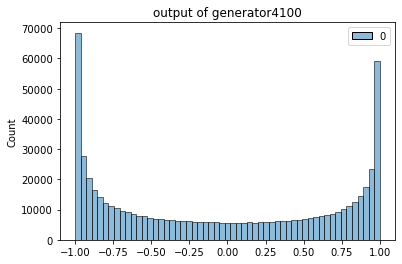

In [7]:
hist.check_output_hist(output, total_epochs)

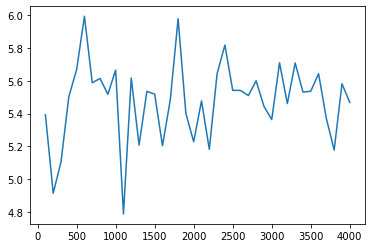

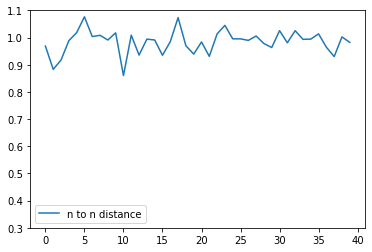

In [10]:
epoch = [i for i in range(saving_step, total_epochs, saving_step)]
plt.plot(epoch, nn_distance)
plt.show()
a = np.array(nn_distance)
a = a / np.sqrt(polymer_len - 1)
plt.plot(a, label='n to n distance')
plt.ylim(0.3,1.1)
plt.legend()
plt.show()

### 64 monomers

In [ ]:
polymer_len = 64
real_directions = np.load(f'../data/random/on_lattices/{polymer_len}/directions.npy')
real_sin_cos = np.load(f'../data/random/on_lattices/{polymer_len}/sin_cos.npy')
real_coordinates = np.load(f'../data/random/on_lattices/{polymer_len}/coordinates.npy')

In [ ]:
import fnn.four_layers as model
z_dim = 8
num_polymer = 10000
polymer_dim = (polymer_len - 2) * 2
generator = model.GeneratorNet(z_dim, polymer_dim)
nn_distance = []
self_avoid_count = []
total_epochs = 4100
saving_step = 100
for i in tqdm(range(saving_step, total_epochs, saving_step)):
    noise = func.get_noise(num_polymer, z_dim)
    check_point = torch.load(f'../experiments/11_11/on_lattices_{polymer_len}/four_layers_sin_cos_gen_{i}.pth.tar')
    generator.load_state_dict(check_point['gen_state_dict'])
    output = generator(noise).data.numpy()
    fake_directions = sincos.sin_cos_to_directions_on_lattices(output)
    coordinates = dc.direction_coordinate_on_lattices(fake_directions)
    nn_distance.append(nn.n_n_distance(coordinates))

In [ ]:
hist.check_output_hist(output, total_epochs)

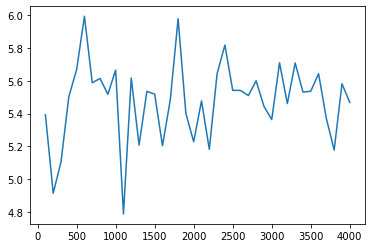

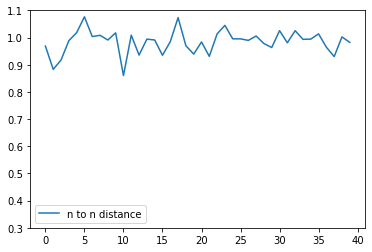

In [11]:
epoch = [i for i in range(saving_step, total_epochs, saving_step)]
plt.plot(epoch, nn_distance)
plt.show()
a = np.array(nn_distance)
a = a / np.sqrt(polymer_len - 1)
plt.plot(a, label='n to n distance')
plt.ylim(0.3,1.1)
plt.legend()
plt.show()

## self-avoid

In [ ]:
import fnn.four_layers as model
polymer_len = 16
z_dim = 8
num_polymer = 10000
polymer_dim = (polymer_len - 2) * 2
generator = model.GeneratorNet(z_dim, polymer_dim)
nn_distance = []
self_avoid_count = []
total_epochs = 4100
saving_step = 100
for i in tqdm(range(saving_step, total_epochs, saving_step)):
    noise = func.get_noise(num_polymer, z_dim)
    check_point = torch.load(f'../experiments/11_10/four_layers_sin_cos_gen_{i}.pth.tar')
    generator.load_state_dict(check_point['gen_state_dict'])
    output = generator(noise).data.numpy()
    # check_output_hist(output, i)
    fake_directions = convert_sin_cos_to_directions(output)
    a = np.zeros((10000, 15, 1))
    # make the first one is forward
    for i in range(len(a)):
        a[i] = np.vstack(([0], fake_directions[i]))
    coordinates = dc.direction_coordinate_three(a, 16)
    nn_distance.append(nn.n_n_distance(coordinates))

    # check the number of self avoid polymers
    # check_list = []
    # for coordinate in coordinates:
    #     check_list.append(check_fold_cross(coordinate))
    # count = 1
    # for i in check_list:
    #     if i == [0,0]:
    #         count += 1
    # self_avoid_count.append(count)

epoch = [i for i in range(saving_step, total_epochs, saving_step)]
# print(self_avoid_count)
print(nn_distance)
# plt.plot(epoch, self_avoid_count)
plt.show()
plt.plot(epoch, nn_distance)

In [ ]:
input_directions = np.load('../data/self_avoid/16/directions.npy')
input_sin_cos = np.load('../data/self_avoid/16/sin_cos.npy')
input_coordinates = np.load('../data/self_avoid/16/coorinates.npy')